In [1]:
import numpy as np
import pandas as pd

In [2]:
star_wars=pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].replace({"Yes":True,"No":False}, inplace=True)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [6]:
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].replace({"Yes":True,"No":False}, inplace=True)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [7]:
#rename columns pertaining to whether the particular movie was seen
seen_mapper={}
seen_any_6_movs_cols=["seen_{}".format(i) for i in range(1,7)]

for old_col_name,new_col_name in zip(star_wars.columns[3:9],seen_any_6_movs_cols):
    seen_mapper[old_col_name]=new_col_name

star_wars=star_wars.rename(columns=seen_mapper)
print(star_wars.columns)

#replace values in each movie seen column with True/False
star_wars_movies=[]
seen_movies_value_mapper={}
for movie_seen_col in seen_any_6_movs_cols:
    col_vals={}
    seen_entries=star_wars[movie_seen_col].unique()
    star_wars_movies.append(seen_entries[0])
    col_vals[seen_entries[0]]=True
    col_vals[np.nan]=False
    seen_movies_value_mapper[movie_seen_col]=col_vals
print(seen_movies_value_mapper)

star_wars=star_wars.replace(seen_movies_value_mapper)
star_wars

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,True,True,True,True,True,True,True,True,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [8]:
# rename columns pertaining to ranking of the 6 star wars movies 
ranking_mapper={}
ranking_6_movies_cols=["ranking_{}".format(i) for i in range(1,7)]
for old_col_name,new_col_name in zip(star_wars.columns[9:15],ranking_6_movies_cols):
    ranking_mapper[old_col_name]=new_col_name
    
star_wars=star_wars.rename(columns=ranking_mapper)
print(star_wars.columns)

# converting column values to numeric types
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.dtypes

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

RespondentID                                                                                                        int64
Have you seen any of the 6 films in the Star Wars franchise?                                                         bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                              object
seen_1                                                                                                               bool
seen_2                                                                                                               bool
seen_3                                                                                                               bool
seen_4                                                                                                               bool
seen_5                                                                                                               bool
seen_6                  

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
#star_wars_movies_formatted=

# Finding the Highest-Ranked Movie

Star Wars: Episode III  Revenge of the Sith     4.341317
Star Wars: Episode II  Attack of the Clones     4.087321
Star Wars: Episode I  The Phantom Menace        3.732934
Star Wars: Episode IV  A New Hope               3.272727
Star Wars: Episode VI Return of the Jedi        3.047847
Star Wars: Episode V The Empire Strikes Back    2.513158
dtype: float64


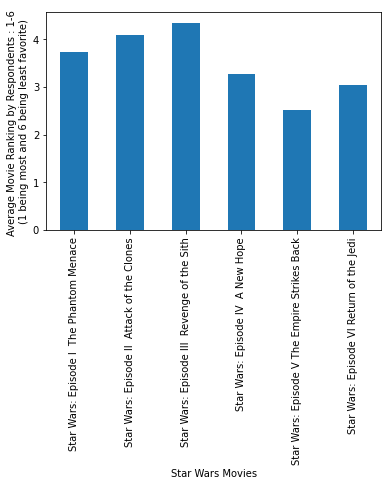

In [11]:
average_movie_ranking=star_wars[ranking_6_movies_cols].mean()
average_movie_ranking.index=star_wars_movies
movies_ranking_listings=average_movie_ranking.sort_values(ascending=False)
print(movies_ranking_listings)
ax_ranking=average_movie_ranking.plot.bar()
#ax_ranking.set_xticklabels(star_wars_movies)
ax_ranking.set_xlabel("Star Wars Movies")
ax_ranking.set_ylabel("Average Movie Ranking by Respondents : 1-6 \n(1 being most and 6 being least favorite)")
plt.show()

It looks like the "original" movies are rated much more highly than the newer ones.

NOTE: "Original" refers to movies I-III, "New" refers to movies IV-VI

# Finding the Most Viewed Movie

Star Wars: Episode V The Empire Strikes Back    758
Star Wars: Episode VI Return of the Jedi        738
Star Wars: Episode I  The Phantom Menace        673
Star Wars: Episode IV  A New Hope               607
Star Wars: Episode II  Attack of the Clones     571
Star Wars: Episode III  Revenge of the Sith     550
dtype: int64


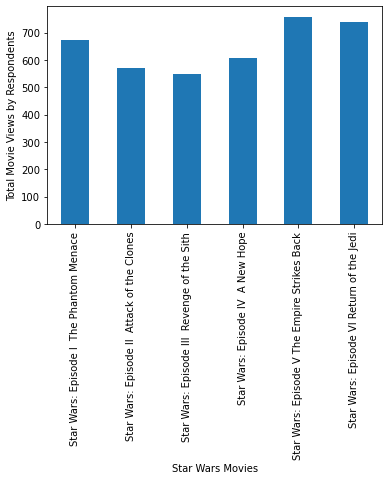

In [12]:
total_movie_views=star_wars[seen_any_6_movs_cols].sum()
total_movie_views.index=star_wars_movies
movies_views_listings=total_movie_views.sort_values(ascending=False)
print(movies_views_listings)
ax_views=total_movie_views.plot.bar()
#ax_views.set_xticklabels(star_wars_movies)
ax_views.set_xlabel("Star Wars Movies")
ax_views.set_ylabel("Total Movie Views by Respondents")
plt.show()

It looks like the "newer" movies are viewed much more than the "older" ones.

-0.8781264941384702


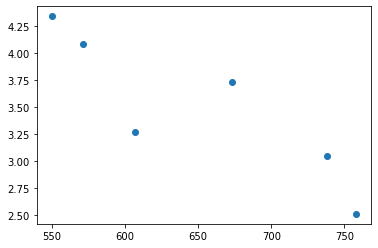

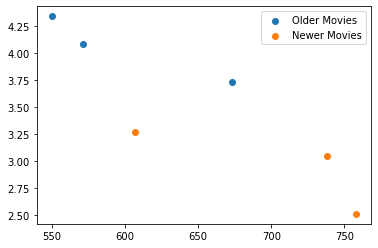

In [13]:
#finding the correlation between total movie views and average movie ranking

views_ranking_r_coeff=total_movie_views.corr(average_movie_ranking)
print(views_ranking_r_coeff)

#since rankings depend on seeing the movie, take variable on x-axis as views
plt.scatter(total_movie_views,average_movie_ranking)
plt.show()

#subdividing the scatter plot according to "old" and "new"
plt.scatter(total_movie_views[:3],average_movie_ranking[:3],label='Older Movies')
plt.scatter(total_movie_views[3:],average_movie_ranking[3:],label='Newer Movies')
plt.legend()
plt.show()

- Overall, there is mostly a strong, negative correlation between the average rating a movie gets, and the number of views garnered by it.
    * An exception is observed between 1st and 4th _Star Wars_ movies. Though the 4th movie has a lower average ranking than 1st one, it has lesser number of views when compared to the first movie(if it followed the general trend, it would have more views than the 1st movie.
    * This surprising negative correlation could be explained by the fact that as the number of views of a movie increases, the avg. rating normalizes and becomes representative of all types of opinions, which might not be the case in movies watched by less people as it might be easily swayed by even a small number of favorable reviews 

- However, within "Older" and "Newer" movies, there are no exceptions. Strong negative correlation is observed in both types.

- In particular, among the "older movies":
    * positive correlation exists between average rating and movie number -- later movies got better ratings by respondents. 
    * However, a negative correlation exists between movie number and views -- later movies got lesser views by respondents. This could be explained by lesser enthusiasm among the general public.

# Exploring the Data by Binary Segments

### _By Gender_

In [14]:
print(star_wars["Gender"].unique())

males = star_wars[star_wars["Gender"] == 'Male']
females = star_wars[star_wars["Gender"] == 'Female']

['Male' nan 'Female']


##### Comparing Movie Ratings 

Average Movie rating according to male respondents
Star Wars: Episode III  Revenge of the Sith     4.274882
Star Wars: Episode II  Attack of the Clones     4.224586
Star Wars: Episode I  The Phantom Menace        4.037825
Star Wars: Episode VI Return of the Jedi        3.002364
Star Wars: Episode IV  A New Hope               2.997636
Star Wars: Episode V The Empire Strikes Back    2.458629
dtype: float64
Average Movie rating according to female respondents
Star Wars: Episode III  Revenge of the Sith     4.418136
Star Wars: Episode II  Attack of the Clones     3.954660
Star Wars: Episode IV  A New Hope               3.544081
Star Wars: Episode I  The Phantom Menace        3.429293
Star Wars: Episode VI Return of the Jedi        3.078086
Star Wars: Episode V The Empire Strikes Back    2.569270
dtype: float64


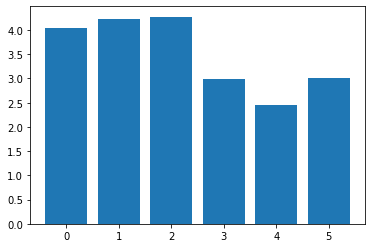

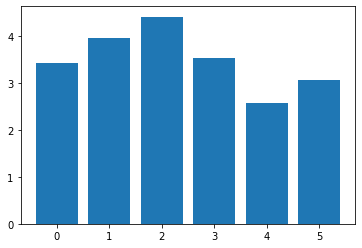

In [15]:
'''
mamr -- male_average_movie_ranking
mmrl -- male_movies_ranking_listings
famr -- female_average_movie_ranking
fmrl -- female_movies_ranking_listings
'''

mamr=males[ranking_6_movies_cols].mean()
mamr.index=star_wars_movies
mmrl=mamr.sort_values(ascending=False)
print("Average Movie rating according to male respondents")
print(mmrl)
famr=females[ranking_6_movies_cols].mean()
famr.index=star_wars_movies
fmrl=famr.sort_values(ascending=False)
print("Average Movie rating according to female respondents")
print(fmrl)

plt.bar(range(6),mamr)
plt.show()
plt.bar(range(6),famr)
plt.show()

##### Comparing Movie Views

Total Movie views according to male respondents
Star Wars: Episode V The Empire Strikes Back    392
Star Wars: Episode VI Return of the Jedi        387
Star Wars: Episode I  The Phantom Menace        361
Star Wars: Episode IV  A New Hope               342
Star Wars: Episode II  Attack of the Clones     323
Star Wars: Episode III  Revenge of the Sith     317
dtype: int64
Total Movie views according to female respondents
Star Wars: Episode V The Empire Strikes Back    353
Star Wars: Episode VI Return of the Jedi        338
Star Wars: Episode I  The Phantom Menace        298
Star Wars: Episode IV  A New Hope               255
Star Wars: Episode II  Attack of the Clones     237
Star Wars: Episode III  Revenge of the Sith     222
dtype: int64


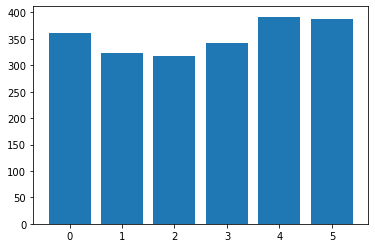

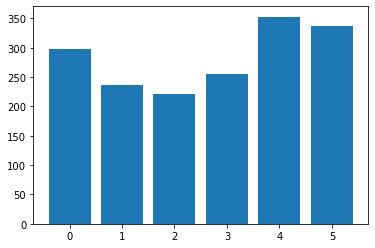

In [16]:
'''
tmmv -- total_male_movie_views
mmvl -- movies_male_views_listings
tfmv -- total_female_movie_views
mfvl -- movies_female_views_listings
'''

tmmv=males[seen_any_6_movs_cols].sum()
tmmv.index=star_wars_movies
mmvl=tmmv.sort_values(ascending=False)
print("Total Movie views according to male respondents")
print(mmvl)
tfmv=females[seen_any_6_movs_cols].sum()
tfmv.index=star_wars_movies
mfvl=tfmv.sort_values(ascending=False)
print("Total Movie views according to female respondents")
print(mfvl)

plt.bar(range(6),tmmv)
plt.show()
plt.bar(range(6),tfmv)
plt.show()

##### Male/Female differences in favorite Star Wars movie and most seen movie

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

### _By the question `Do you consider yourself to be a fan of the Star Wars film franchise?`_

In [17]:
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique())

SW_franchise_fan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
SW_franchise_non_fan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

[True nan False]


##### Comparing Movie Ratings 

Average Movie rating according to respondents who are fans of the Star Wars film franchise
Star Wars: Episode III  Revenge of the Sith     4.417423
Star Wars: Episode II  Attack of the Clones     4.342391
Star Wars: Episode I  The Phantom Menace        4.141304
Star Wars: Episode IV  A New Hope               2.932971
Star Wars: Episode VI Return of the Jedi        2.829710
Star Wars: Episode V The Empire Strikes Back    2.333333
dtype: float64
Average Movie rating according to respondents who are not fans of the Star Wars film franchise
Star Wars: Episode III  Revenge of the Sith     4.193662
Star Wars: Episode IV  A New Hope               3.933099
Star Wars: Episode II  Attack of the Clones     3.591549
Star Wars: Episode VI Return of the Jedi        3.471831
Star Wars: Episode I  The Phantom Menace        2.936396
Star Wars: Episode V The Empire Strikes Back    2.862676
dtype: float64


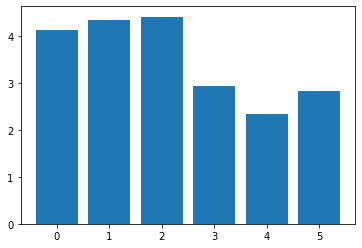

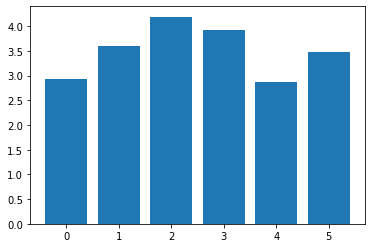

In [18]:
'''
swfamr -- star_wars_fan_average_movie_ranking
swfmrl -- star_wars_fan_movies_ranking_listings
swnfamr -- star_wars_non_fan_average_movie_ranking
swnfmrl -- star_wars_non_fan_movies_ranking_listings
'''

swfamr=SW_franchise_fan[ranking_6_movies_cols].mean()
swfamr.index=star_wars_movies
swfmrl=swfamr.sort_values(ascending=False)
print("Average Movie rating according to respondents who are fans of the Star Wars film franchise")
print(swfmrl)
swnfamr=SW_franchise_non_fan[ranking_6_movies_cols].mean()
swnfamr.index=star_wars_movies
swnfmrl=swnfamr.sort_values(ascending=False)
print("Average Movie rating according to respondents who are not fans of the Star Wars film franchise")
print(swnfmrl)

plt.bar(range(6),swfamr)
plt.show()
plt.bar(range(6),swnfamr)
plt.show()

##### Comparing Movie Views

Total Movie views according to respondents who are fans of the Star Wars film franchise
Star Wars: Episode V The Empire Strikes Back    538
Star Wars: Episode VI Return of the Jedi        537
Star Wars: Episode I  The Phantom Menace        500
Star Wars: Episode IV  A New Hope               483
Star Wars: Episode II  Attack of the Clones     463
Star Wars: Episode III  Revenge of the Sith     450
dtype: int64
Total Movie views according to female respondents who are not fans of the Star Wars film franchise
Star Wars: Episode V The Empire Strikes Back    220
Star Wars: Episode VI Return of the Jedi        201
Star Wars: Episode I  The Phantom Menace        173
Star Wars: Episode IV  A New Hope               124
Star Wars: Episode II  Attack of the Clones     108
Star Wars: Episode III  Revenge of the Sith     100
dtype: int64


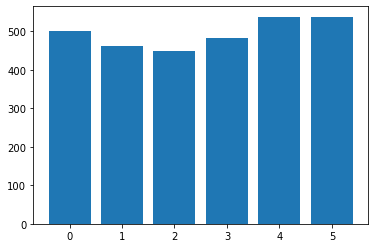

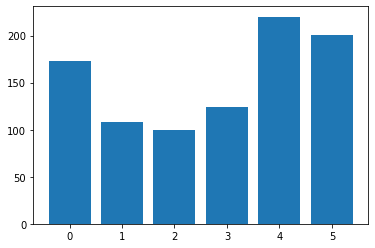

In [19]:
'''
tswfmv -- total_star_wars_fan_movie_views
mswfvl -- movies_star_wars_fan_views_listings
tswnfmv -- total_star_wars_non_fan_movie_views
mswnfvl -- movies_star_wars_non_fan_views_listings
'''

tswfmv=SW_franchise_fan[seen_any_6_movs_cols].sum()
tswfmv.index=star_wars_movies
mswfvl=tswfmv.sort_values(ascending=False)
print("Total Movie views according to respondents who are fans of the Star Wars film franchise")
print(mswfvl)
tswnfmv=SW_franchise_non_fan[seen_any_6_movs_cols].sum()
tswnfmv.index=star_wars_movies
mswnfvl=tswnfmv.sort_values(ascending=False)
print("Total Movie views according to female respondents who are not fans of the Star Wars film franchise")
print(mswnfvl)

plt.bar(range(6),tswfmv)
plt.show()
plt.bar(range(6),tswnfmv)
plt.show()

### _By the question `Do you consider yourself to be a fan of the Star Trek franchise?`_

In [20]:
print(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].unique())

ST_franchise_fan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
ST_franchise_non_fan=star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']

['No' 'Yes' nan]


##### Comparing Movie Ratings 

Average Movie rating according to respondents who are fans of the Star Trek film franchise
Star Wars: Episode III  Revenge of the Sith     4.403382
Star Wars: Episode II  Attack of the Clones     4.255422
Star Wars: Episode I  The Phantom Menace        3.968675
Star Wars: Episode IV  A New Hope               3.110843
Star Wars: Episode VI Return of the Jedi        2.850602
Star Wars: Episode V The Empire Strikes Back    2.407229
dtype: float64
Average Movie rating according to respondents who are not fans of the Star Trek film franchise
Star Wars: Episode III  Revenge of the Sith     4.278450
Star Wars: Episode II  Attack of the Clones     3.915254
Star Wars: Episode I  The Phantom Menace        3.487864
Star Wars: Episode IV  A New Hope               3.433414
Star Wars: Episode VI Return of the Jedi        3.244552
Star Wars: Episode V The Empire Strikes Back    2.634383
dtype: float64


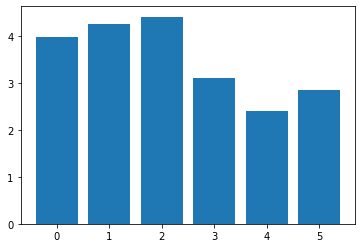

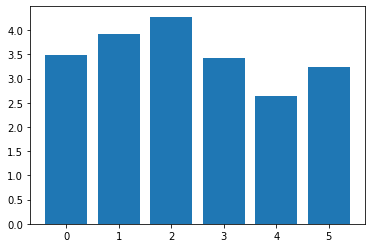

In [21]:
'''
stfamr -- star_trek_fan_average_movie_ranking
stfmrl -- star_trek_fan_movies_ranking_listings
stnfamr -- star_trek_non_fan_average_movie_ranking
stnfmrl -- star_trek_non_fan_movies_ranking_listings
'''

stfamr=ST_franchise_fan[ranking_6_movies_cols].mean()
stfamr.index=star_wars_movies
stfmrl=stfamr.sort_values(ascending=False)
print("Average Movie rating according to respondents who are fans of the Star Trek film franchise")
print(stfmrl)
stnfamr=ST_franchise_non_fan[ranking_6_movies_cols].mean()
stnfamr.index=star_wars_movies
stnfmrl=stnfamr.sort_values(ascending=False)
print("Average Movie rating according to respondents who are not fans of the Star Trek film franchise")
print(stnfmrl)

plt.bar(range(6),stfamr)
plt.show()
plt.bar(range(6),stnfamr)
plt.show()

##### Comparing Movie Views

Total Movie views according to respondents who are fans of the Star Trek film franchise
Star Wars: Episode V The Empire Strikes Back    397
Star Wars: Episode VI Return of the Jedi        396
Star Wars: Episode I  The Phantom Menace        364
Star Wars: Episode IV  A New Hope               342
Star Wars: Episode II  Attack of the Clones     336
Star Wars: Episode III  Revenge of the Sith     322
dtype: int64
Total Movie views according to respondents who are not fans of the Star Trek film franchise
Star Wars: Episode V The Empire Strikes Back    353
Star Wars: Episode VI Return of the Jedi        334
Star Wars: Episode I  The Phantom Menace        301
Star Wars: Episode IV  A New Hope               258
Star Wars: Episode II  Attack of the Clones     228
Star Wars: Episode III  Revenge of the Sith     221
dtype: int64


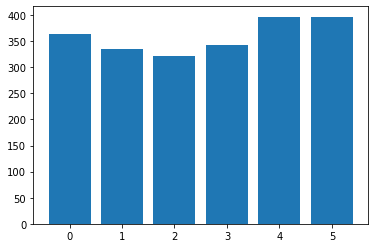

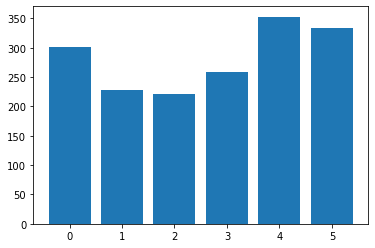

In [22]:
'''
tstfmv -- total_star_trek_fan_movie_views
mstfvl -- movies_star_trek_fan_views_listings
tstnfmv -- total_star_trek_non_fan_movie_views
mstnfvl -- movies_star_trek_non_fan_views_listings
'''

tstfmv=ST_franchise_fan[seen_any_6_movs_cols].sum()
tstfmv.index=star_wars_movies
mstfvl=tstfmv.sort_values(ascending=False)
print("Total Movie views according to respondents who are fans of the Star Trek film franchise")
print(mstfvl)
tstnfmv=ST_franchise_non_fan[seen_any_6_movs_cols].sum()
tstnfmv.index=star_wars_movies
mstnfvl=tstnfmv.sort_values(ascending=False)
print("Total Movie views according to respondents who are not fans of the Star Trek film franchise")
print(mstnfvl)

plt.bar(range(6),tstfmv)
plt.show()
plt.bar(range(6),tstnfmv)
plt.show()

### _By respondent's education_

In [23]:
respondent_education_levels = star_wars['Education'].unique()
print(respondent_education_levels)

survey_grouped_by_education_level = star_wars.groupby('Education')

education_level_segmented_data=[survey_grouped_by_education_level.get_group(education_level) for education_level in respondent_education_levels if education_level == education_level]

['High school degree' 'Bachelor degree' 'Some college or Associate degree'
 nan 'Graduate degree' 'Less than high school degree']


##### Comparing Movie Ratings 

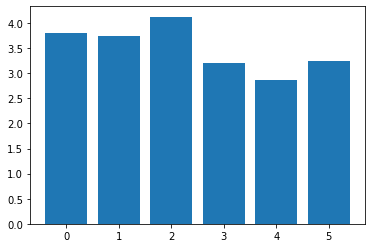

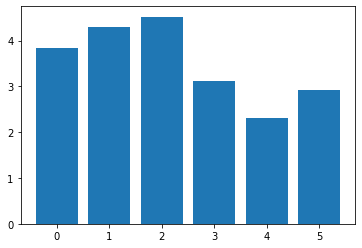

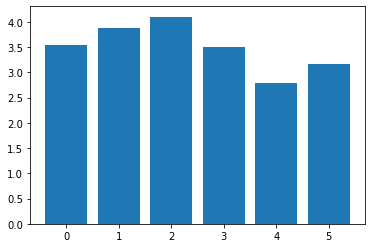

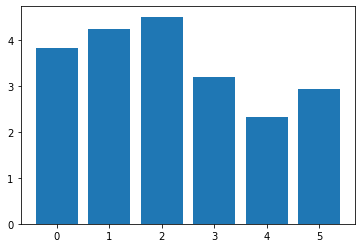

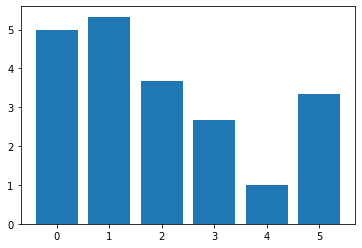

In [24]:
for education_data in education_level_segmented_data:
    plt.bar(range(6),education_data[ranking_6_movies_cols].mean())
    plt.show()

##### Comparing Movie Views

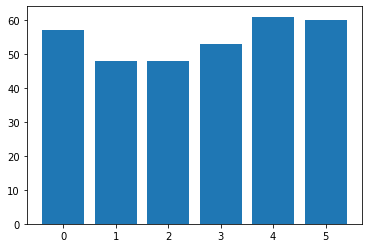

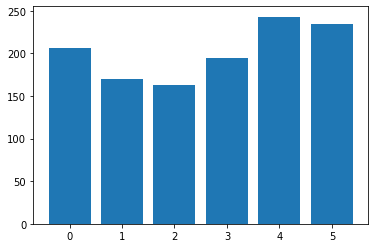

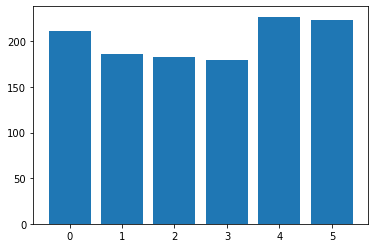

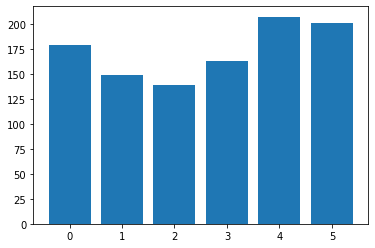

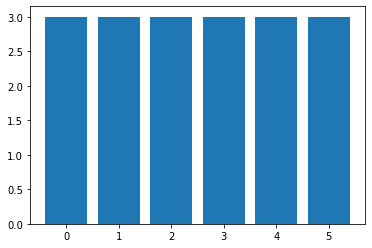

In [25]:
for education_data in education_level_segmented_data:
    plt.bar(range(6),education_data[seen_any_6_movs_cols].sum())
    plt.show()

### _By respondent's Location (Census Region)_

In [26]:
respondent_locations = star_wars['Location (Census Region)'].unique()
print(respondent_locations)

survey_grouped_by_location = star_wars.groupby('Location (Census Region)')

location_segmented_data=[survey_grouped_by_location.get_group(location) for location in respondent_locations if location == location]

['South Atlantic' 'West South Central' 'West North Central'
 'Middle Atlantic' 'East North Central' 'Pacific' nan 'Mountain'
 'New England' 'East South Central']


##### Comparing Movie Ratings 

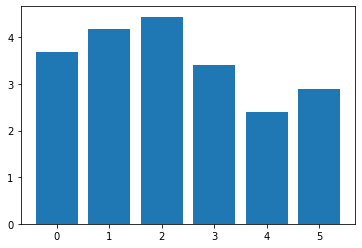

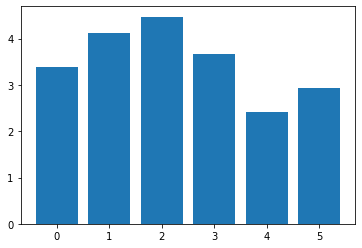

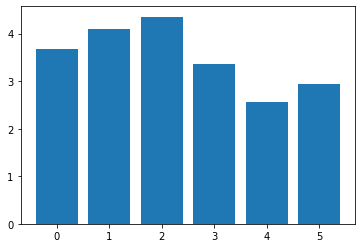

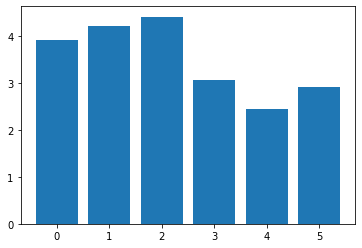

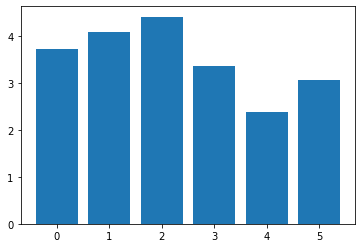

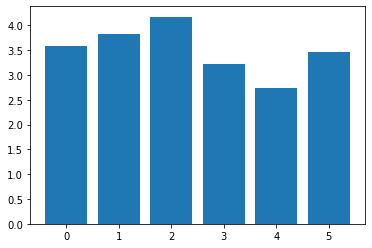

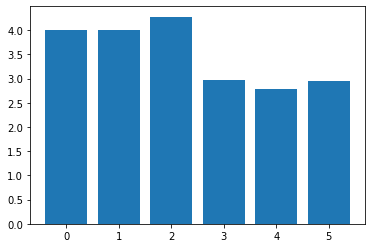

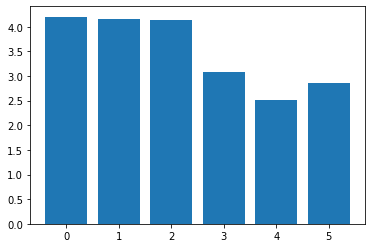

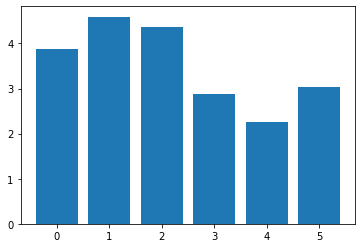

In [27]:
for location_data in location_segmented_data:
    plt.bar(range(6),location_data[ranking_6_movies_cols].mean())
    plt.show()

##### Comparing Movie Views

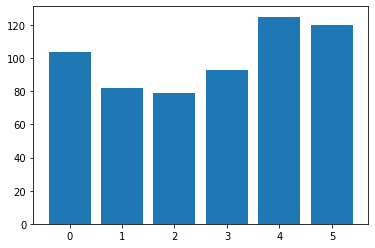

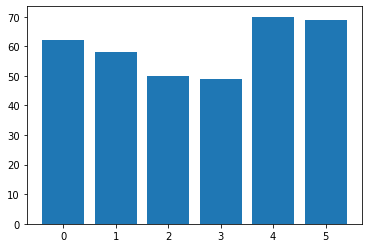

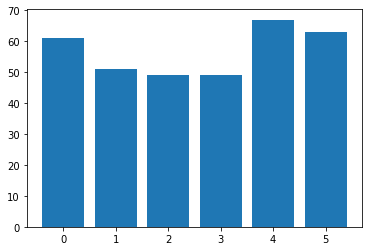

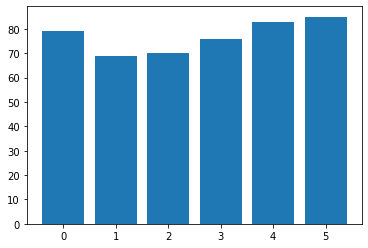

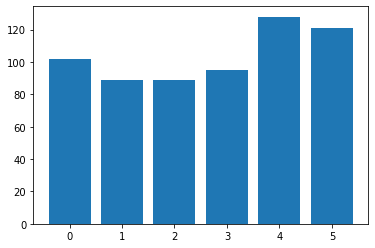

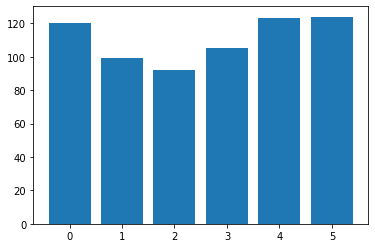

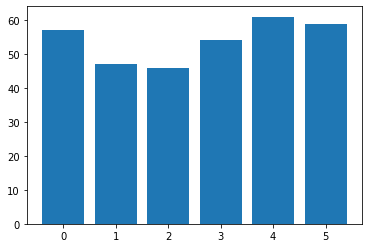

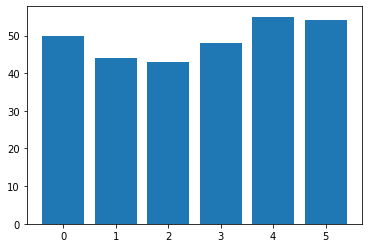

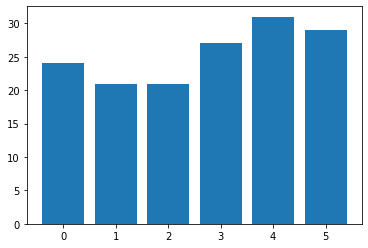

In [28]:
for location_data in location_segmented_data:
    plt.bar(range(6),location_data[seen_any_6_movs_cols].sum())
    plt.show()

### _By the question `Which character shot first?`_

In [29]:
respondent_answers_for_which_character_shot_first=star_wars['Which character shot first?'].unique()
print(respondent_answers_for_which_character_shot_first)

survey_grouped_by_Which_character_shot_first_Q_answer=star_wars.groupby('Which character shot first?')

Which_character_shot_first_answer_segmented_data=[survey_grouped_by_Which_character_shot_first_Q_answer.get_group(answer) for answer in respondent_answers_for_which_character_shot_first if answer == answer]

["I don't understand this question" nan 'Greedo' 'Han']


##### Comparing Movie Ratings 

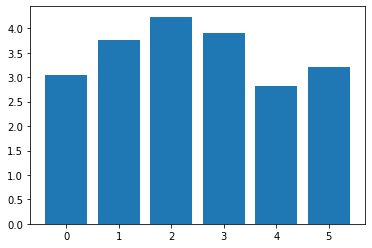

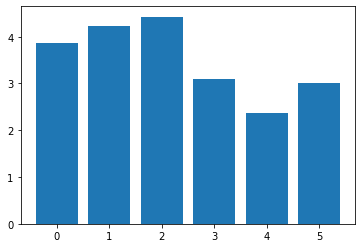

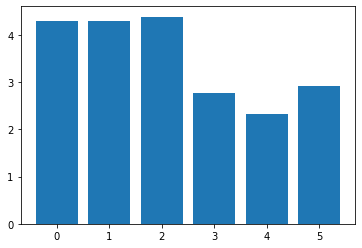

In [30]:
for answer_data in Which_character_shot_first_answer_segmented_data:
    plt.bar(range(6),answer_data[ranking_6_movies_cols].mean())
    plt.show()

##### Comparing Movie Views

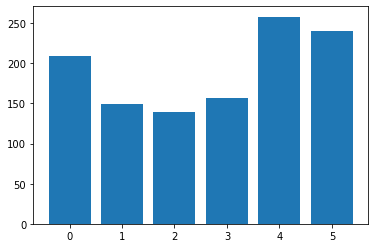

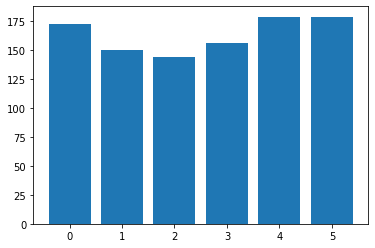

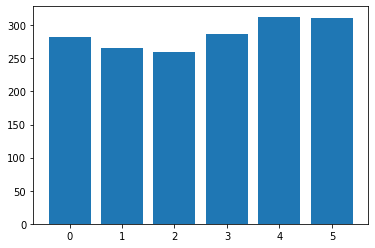

In [31]:
for answer_data in Which_character_shot_first_answer_segmented_data:
    plt.bar(range(6),answer_data[seen_any_6_movs_cols].sum())
    plt.show()

In [32]:
star_wars.iloc[:,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably
1182,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Neither favorably nor unfavorably (neutral),Very unfavorably,Somewhat favorably,Unfamiliar (N/A),Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably
1183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1184,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Very favorably


In [33]:
# rename columns pertaining to favorability of a character(i.e for the Question : Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.)
character_favorability_mapper={}
character_favorability_cols=["view_character_{}".format(i) for i in range(1,15)]
for old_col_name,new_col_name in zip(star_wars.columns[15:29],character_favorability_cols):
    character_favorability_mapper[old_col_name]=new_col_name
    
star_wars=star_wars.rename(columns=character_favorability_mapper)
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'view_character_1', 'view_character_2', 'view_character_3',
       'view_character_4', 'view_character_5', 'view_character_6',
       'view_character_7', 'view_character_8', 'view_character_9',
       'view_character_10', 'view_character_11', 'view_character_12',
       'view_character_13', 'view_character_14', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')


# Computing number of favorable, unfavorable, neutral and unfamiliar views each character gets

In [34]:
# retrieving the responses that can be chosen for each character and broadly grouping views
favorability_values = pd.concat([star_wars[character_favorability] for character_favorability in character_favorability_cols]).unique()

check_boxes_options=[value for value in favorability_values if value == value]
print(check_boxes_options)

favorable_keywords=['Very favorably', 'Somewhat favorably']
unfavorable_keywords=['Very unfavorably', 'Somewhat unfavorably']

['Very favorably', 'Somewhat favorably', 'Neither favorably nor unfavorably (neutral)', 'Somewhat unfavorably', 'Unfamiliar (N/A)', 'Very unfavorably']


In [35]:
combined_characters_views_list=[star_wars[character_favorability_col].value_counts().to_frame().transpose() for character_favorability_col in character_favorability_cols]
combined_characters_views_df=pd.concat(combined_characters_views_list)
combined_characters_views_df

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Unfamiliar (N/A),Somewhat unfavorably,Very unfavorably
view_character_1,610,151,44,15,8,1
view_character_2,552,219,38,6,13,3
view_character_3,547,210,48,8,12,6
view_character_4,245,269,135,52,83,39
view_character_5,591,159,43,17,8,7
view_character_6,110,143,213,156,68,124
view_character_7,310,171,84,10,102,149
view_character_8,142,223,236,148,63,8
view_character_9,138,153,248,132,96,45
view_character_10,474,229,79,15,23,7


In [36]:
combined_characters_views_df["total_favorable_views"]=combined_characters_views_df[favorable_keywords].sum(axis=1)
combined_characters_views_df["total_unfavorable_views"]=combined_characters_views_df[unfavorable_keywords].sum(axis=1)
combined_characters_views_df

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Unfamiliar (N/A),Somewhat unfavorably,Very unfavorably,total_favorable_views,total_unfavorable_views
view_character_1,610,151,44,15,8,1,761,9
view_character_2,552,219,38,6,13,3,771,16
view_character_3,547,210,48,8,12,6,757,18
view_character_4,245,269,135,52,83,39,514,122
view_character_5,591,159,43,17,8,7,750,15
view_character_6,110,143,213,156,68,124,253,192
view_character_7,310,171,84,10,102,149,481,251
view_character_8,142,223,236,148,63,8,365,71
view_character_9,138,153,248,132,96,45,291,141
view_character_10,474,229,79,15,23,7,703,30


### _Character most liked by respondents_

In [37]:
combined_characters_views_df.sort_values('total_favorable_views', ascending=False)

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Unfamiliar (N/A),Somewhat unfavorably,Very unfavorably,total_favorable_views,total_unfavorable_views
view_character_2,552,219,38,6,13,3,771,16
view_character_1,610,151,44,15,8,1,761,9
view_character_3,547,210,48,8,12,6,757,18
view_character_5,591,159,43,17,8,7,750,15
view_character_14,605,144,51,10,8,8,749,16
view_character_11,562,185,57,10,10,6,747,16
view_character_10,474,229,79,15,23,7,703,30
view_character_4,245,269,135,52,83,39,514,122
view_character_7,310,171,84,10,102,149,481,251
view_character_8,142,223,236,148,63,8,365,71


Character 2 is most liked by respondents

### _Character most disliked by respondents_

In [38]:
combined_characters_views_df.sort_values('total_unfavorable_views', ascending=False)

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Unfamiliar (N/A),Somewhat unfavorably,Very unfavorably,total_favorable_views,total_unfavorable_views
view_character_12,112,130,164,109,102,204,242,306
view_character_7,310,171,84,10,102,149,481,251
view_character_6,110,143,213,156,68,124,253,192
view_character_9,138,153,248,132,96,45,291,141
view_character_4,245,269,135,52,83,39,514,122
view_character_13,168,183,207,164,58,34,351,92
view_character_8,142,223,236,148,63,8,365,71
view_character_10,474,229,79,15,23,7,703,30
view_character_3,547,210,48,8,12,6,757,18
view_character_2,552,219,38,6,13,3,771,16


Character 12 is most liked by respondents

### _Character that is the most controversial according to respondents(split between likes and dislikes)_

In [39]:
combined_characters_views_df["cumulative_favorable_unfavorable_diff"]=abs(combined_characters_views_df['total_favorable_views']-combined_characters_views_df['total_unfavorable_views'])
combined_characters_views_df.sort_values('cumulative_favorable_unfavorable_diff')

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Unfamiliar (N/A),Somewhat unfavorably,Very unfavorably,total_favorable_views,total_unfavorable_views,cumulative_favorable_unfavorable_diff
view_character_6,110,143,213,156,68,124,253,192,61
view_character_12,112,130,164,109,102,204,242,306,64
view_character_9,138,153,248,132,96,45,291,141,150
view_character_7,310,171,84,10,102,149,481,251,230
view_character_13,168,183,207,164,58,34,351,92,259
view_character_8,142,223,236,148,63,8,365,71,294
view_character_4,245,269,135,52,83,39,514,122,392
view_character_10,474,229,79,15,23,7,703,30,673
view_character_11,562,185,57,10,10,6,747,16,731
view_character_14,605,144,51,10,8,8,749,16,733


Characters 6 and 12 are the most controversial characters according to respondents.